# 2D Sample

In [1]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

In [3]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [5]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [6]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

# 2D Networkx and Plotly


In [18]:
import random
node_list = ["A","B","C","D","E","F","G","H","E"]
def draw_number(length):
    """determines a random index number for selection."""
    from_index = random.randint(0,length)
    to_index = random.randint(0,length)
    return from_index, to_index
from_list = []
to_list = []
counter = 20
i = 0
while i < counter:
    from_index, to_index = draw_number(len(node_list)-1)
    if from_index == to_index:
        continue
    from_list.append(node_list[from_index])
    to_list.append(node_list[to_index])
    i += 1

print(from_list)
print(to_list)

['E', 'A', 'F', 'C', 'G', 'H', 'D', 'F', 'A', 'D', 'G', 'B', 'B', 'D', 'G', 'B', 'A', 'C', 'B', 'H']
['A', 'E', 'H', 'G', 'E', 'D', 'C', 'C', 'H', 'B', 'B', 'H', 'E', 'B', 'E', 'F', 'G', 'A', 'C', 'C']


In [19]:
import networkx as nx
import plotly.graph_objs as go
G = nx.Graph()
for i in range(len(node_list)):
    G.add_node(node_list[i])
    G.add_edges_from([(from_list[i], to_list[i])])

In [21]:
pos = nx.spring_layout(G, k=0.5, iterations=100)
#pos = nx.draw_random(G)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [22]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [23]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='pinkyl',
        reversescale=True,
        color=[],
        size=37,
        colorbar=dict(
            thickness=1,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = adjacencies[0]
    node_trace['text'] += tuple([node_info])

In [24]:
title = "Network Graph Demonstration"
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                title=title,
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=21, l=5, r=5, t=40),
                annotations=[dict(
                    text="Text Here",
                    showarrow=False,
                    xref="paper", yref="paper")],
                xaxis=dict(showgrid=False, zeroline=False,
                           showticklabels=False, mirror=True),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, mirror=True)))
fig.show()

# Own Graph

In [389]:
import pandas as pd
import numpy as np
df = pd.read_csv("../models/BERTopic100CharMin2500CharMax_10ClassesRedo/df.csv")
df['uniqueIdentifier'] = df.apply(lambda x: x["chat"] + "_" + str(x["messageID"]), axis=1)
df['uniqueIdentifierReply'] = df.apply(lambda x: x["chat"] + "_" + str(x["messageReplyID"])[:-2], axis=1)
# df = df[~df.chat.isin(["https://t.me/campax_ukraine_help_switzerland", "https://t.me/helppetsfromukraine"])] 


In [390]:
df_actors = pd.DataFrame(columns=["cluster", "message_sender", "nr_post"])
for i in df[df.cluster!=-1].cluster.unique():
    # df[df['cluster_name']==i].value_counts('messageSender').iloc[:10]
    df_actors_i = df[df['cluster']==i].value_counts('messageSender').iloc[:10].reset_index()
    df_actors_i["cluster"] = i
    df_actors_i = df_actors_i[["cluster", "messageSender", 0]]
    df_actors_i.columns = ["cluster", "message_sender", "nr_post"]
    df_actors = pd.concat([df_actors, df_actors_i], axis=0)

In [412]:
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random
from matplotlib.pyplot import figure

color_map = {
    "contributor": '#112073',
    "0":'#9699b6',
    "1":'#097f62',
    "2":'#9f69e5',
    "3":'#6c4605',
    "4":'#5d6034',
    "5":'#a4b769',
    "6":'#034dba',
    "7":'#8b370e',
    "8":'#9b8c3e',
    "9":'#964980',
}
node_network_map = []
edge_network_map =[]
for main_contributor in df_actors.message_sender.unique():
    node_network_map.append([str(main_contributor), 'contributor'])
    for uniqueIdentifier, cluster in df[(df.messageSender==main_contributor) & (df.cluster!=-1)][["uniqueIdentifier", "cluster"]].values:
        node_network_map.append([str(uniqueIdentifier),str(cluster)])
        edge_network_map.append([str(main_contributor), str(uniqueIdentifier) ])

node_network_map = dict(node_network_map)
graph = nx.Graph()
graph.add_nodes_from(list(node_network_map.keys()), size=300)
graph.add_edges_from(edge_network_map, color="#000000")
nodes_by_color = {val: [node for node in graph if color_map[node_network_map[node]] == val]
                for val in list(color_map.values())}
df_node = pd.DataFrame({'node':node_network_map.keys(), 'type':node_network_map.values()})
df_node["color"] = df_node['type'].apply(lambda x: list(color_map.values())[list(color_map.keys()).index(x)])
pos = nx.random_layout(graph)   # replaces your original pos=... TODO try different layouts random_layout, spectral_layout and circular layout seem to work well
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(color_map.values()))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    #color = 'black'
    # posx = 0
    if ea in nodes_by_color['#112073']:
        continue
    elif ea in nodes_by_color['#9699b6']:
        posx = 1
    elif ea in nodes_by_color['#097f62']:
        posx = 2
    elif ea in nodes_by_color['#9f69e5']:
        posx = 3
    elif ea in nodes_by_color['#6c4605']:
        posx = 4
    elif ea in nodes_by_color['#5d6034']:
        posx = 5
    elif ea in nodes_by_color['#a4b769']:
        posx = 6
    elif ea in nodes_by_color['#034dba']:
        posx = 7
    elif ea in nodes_by_color['#8b370e']:
        posx = 8
    elif ea in nodes_by_color['#9b8c3e']:
        posx = 9
    elif ea in nodes_by_color['#964980']:
        posx = 10
    else:
        pass
    #  print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]
# edges = graph.edges()

# plt.figure(figsize=(40,40))
# for color, node_names in nodes_by_color.items():
#     nx.draw_networkx_nodes(graph, pos=pos, nodelist=node_names, node_color=color)

In [419]:
from pyvis.network import Network
graph_dict = {}
graph_dict["edges"] = list(pos.keys())
graph_dict["x_coordinate"] = [item[0]*10000 for item in list(pos.values())]
graph_dict["y_coordinate"] = [item[1]*10000 for item in list(pos.values())]
graph_dict["value"] = [500 for item in list(pos.values())]
# g = Network("1000px", "1000px", heading="Graph")
g = Network(height="1500px",
            width="100%",
            # bgcolor="#222222",
            # font_color="white",
            # directed=True,
            filter_menu=True,
            #select_menu=True
            )
# g = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",
            #    filter_menu=True)
g.toggle_physics(False)
g.from_nx(graph)
pos_x = [item[0]*10000 for item in list(pos.values())]
pos_y = [item[1]*10000 for item in list(pos.values())]
for index, node_entry in enumerate(g.get_network_data()[0]):
    node_entry["x"] = pos_x[index] 
    node_entry["y"] = pos_y[index]
    node_entry["color"] = df_node["color"].values[index]
# g.show_buttons(filter_=['configure'])

g.show('../../graphBB.html', local=True)

FileNotFoundError: [Errno 2] No such file or directory: '~/graphBB.html'

In [422]:
!ls ../../../../../

Accessibility                      LaunchAgents
Accounts                           Logs
Application Scripts                Mail
Application Support                Maps
Assistant                          Messages
Assistants                         Metadata
Audio                              Mobile Documents
Autosave Information               News
Biome                              Passes
Caches                             PersonalizationPortrait
Calendars                          Photos
CallServices                       PreferencePanes
CloudStorage                       Preferences
ColorPickers                       Printers
Colors                             Python
Compositions                       PythonWrapper
Contacts                           Receipts
ContainerManager                   Reminders
Containers                         ResponseKit
Cookies                            Safari
CoreFollowUp                       SafariSafeBrowsing
DES                                SafariSan

In [378]:
messages = df[(df.messageSender.isin(df_actors.message_sender.unique())) & (df.cluster!=-1)].uniqueIdentifier

In [379]:
df[df.uniqueIdentifierReply.isin(messages.values)]

,chat,messageSender,messageID,messageReplyID,messageDatetime,messageText,cluster,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,uniqueIdentifier,uniqueIdentifierReply
122,https://t.me/refugeesinSwitzerland,5134731230,155897,155896.0,2022-10-10 19:43:25+00:00,Круто 👍,-1,2.639333e-03,3.695205e-03,1.187289e-02,3.450060e-03,2.228712e-03,1.065770e-02,2.864070e-04,3.200887e-03,5.084458e-03,2.274026e-02,https://t.me/refugeesinSwitzerland_155897,https://t.me/refugeesinSwitzerland_155896
128,https://t.me/refugeesinSwitzerland,5134731230,155891,155890.0,2022-10-10 19:38:08+00:00,"Спасибо огромное! Халбтакс - сколько стоит, мо...",-1,1.332515e-02,1.364615e-02,1.305981e-01,2.228190e-02,8.833884e-03,2.958762e-02,6.844762e-04,1.464229e-02,1.966622e-02,4.477217e-02,https://t.me/refugeesinSwitzerland_155891,https://t.me/refugeesinSwitzerland_155890
134,https://t.me/refugeesinSwitzerland,5134731230,155885,155881.0,2022-10-10 19:22:47+00:00,"Спасибо! А если на билете написано зона 100,12...",2,1.319746e-03,4.019989e-03,1.331533e-02,2.264365e-03,2.185411e-03,6.076530e-03,9.686777e-05,3.333189e-03,7.488284e-02,1.156672e-02,https://t.me/refugeesinSwitzerland_155885,https://t.me/refugeesinSwitzerland_155881
227,https://t.me/refugeesinSwitzerland,1838390552,155704,155698.0,2022-10-10 13:06:24+00:00,Я не хочу и не буду комментировать конкретный ...,-1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,https://t.me/refugeesinSwitzerland_155704,https://t.me/refugeesinSwitzerland_155698
238,https://t.me/refugeesinSwitzerland,5134731230,155689,155688.0,2022-10-10 12:49:42+00:00,"Круто, спасибо 🙏!!! А где его можно купить?",-1,4.593983e-118,2.248552e-110,1.865026e-03,4.292574e-111,1.582326e-110,1.842728e-110,1.416945e-120,3.849119e-103,6.189607e-110,7.750871e-104,https://t.me/refugeesinSwitzerland_155689,https://t.me/refugeesinSwitzerland_155688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267915,https://t.me/SwissUA,1394972018,11758,11745.0,2022-03-24 21:56:15+00:00,Я теж вказувала одну пошту і на себе і на дити...,-1,2.741896e-13,8.311284e-14,8.154391e-14,3.439208e-01,1.789242e-13,7.730728e-17,1.013866e-19,7.281108e-14,1.892656e-01,7.310254e-14,https://t.me/SwissUA_11758,https://t.me/SwissUA_11745
267962,https://t.me/SwissUA,1436680033,11689,11684.0,2022-03-24 20:54:55+00:00,А с Италии можно доехать недорого?,-1,1.373761e-02,5.408965e-03,4.177763e-03,2.772020e-02,9.049396e-03,5.565487e-07,3.074611e-10,3.700963e-03,7.966576e-03,3.918513e-03,https://t.me/SwissUA_11689,https://t.me/SwissUA_11684
268765,https://t.me/SwissUA,472546844,10205,10203.0,2022-03-23 09:45:27+00:00,Ну так я про это и говорю,-1,1.792477e-16,5.412788e-28,6.331609e-17,1.171336e-16,6.414576e-17,8.155408e-34,5.877426e-37,5.811109e-17,1.041354e-27,1.012820e-17,https://t.me/SwissUA_10205,https://t.me/SwissUA_10203
268776,https://t.me/SwissUA,319632929,10194,10192.0,2022-03-23 09:42:01+00:00,"Вы имеете в виду , что это надо снова ехать в ...",3,6.190477e-03,4.255415e-03,9.326542e-03,7.222855e-03,3.584673e-03,1.211856e-02,9.009206e-05,3.793115e-03,5.288002e-03,1.296913e-02,https://t.me/SwissUA_10194,https://t.me/SwissUA_10192


In [380]:
"https://t.me/SwissUA_3981.0"[:-2]

'https://t.me/SwissUA_3981'

In [381]:
len(g.get_nodes())

6745

In [382]:
df[df.uniqueIdentifierReply.isin(df[(df.messageSender==main_contributor) & (df.cluster!=-1)].uniqueIdentifier.values)]

,chat,messageSender,messageID,messageReplyID,messageDatetime,messageText,cluster,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,uniqueIdentifier,uniqueIdentifierReply


In [383]:
replies_per_message_list = []
for main_contributor in df_actors.message_sender.unique():
    messageID_main_contributor = df[(df.messageSender==main_contributor) & (df.cluster!=-1)].uniqueIdentifier.values
    try:
        replies_per_message = df[df.uniqueIdentifierReply.isin(messageID_main_contributor)].shape[0]/len(messageID_main_contributor)
    except ZeroDivisionError:
        replies_per_message_list.append("Error")
        continue
    replies_per_message_list.append(replies_per_message)

df_avg_replies = pd.DataFrame({'main_contributor':df_actors.message_sender.unique(), "avg_replies":replies_per_message_list})

contribution_to_cluster = []
for main_contributor in df_actors.message_sender.unique():
    contribution_to_cluster.append(len(df[(df.messageSender==main_contributor) & (df.cluster!=-1)].cluster.unique()))

df_cluster_contribution = pd.DataFrame({'main_contributor':df_actors.message_sender.unique(), "nr_cluster": contribution_to_cluster})

    

In [ ]:
df_cluster_contribution.sort_values("nr_cluster", ascending=False)

In [ ]:
df_avg_replies.sort_values("avg_replies", ascending=False)

In [409]:
from pyvis.network import Network

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",
                  filter_menu=True)
net.add_nodes(['אברהם', 'שרה'])
net.add_edge('אברהם', 'שרה')
net.show('filter.html')

In [402]:
from pyvis.network import Network

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",
                  select_menu=True)
net.add_nodes(['אברהם', 'שרה'])
net.add_edge('אברהם', 'שרה')
net.show('select.html')

In [183]:
g.get_network_data()[0][0]['x'] = 0
g.get_network_data()[0][0]['y'] = 0

In [205]:
df_contributor[df_contributor.uniqueIdentifier=="https://t.me/zurich_hb_help_2554"]

,chat,messageSender,messageID,messageReplyID,messageDatetime,messageText,cluster,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,uniqueIdentifier
138865,https://t.me/zurich_hb_help,5228353505,2554,NaN,2022-03-18 17:29:49+00:00,"Кто знает, Dutwillerstrasse завтра открыт для ...",3,0.002632,0.011404,0.033276,0.005064,0.010469,0.019491,0.000133,0.011241,0.024685,0.037256,https://t.me/zurich_hb_help_2554


In [206]:
df_contributor[df_contributor.uniqueIdentifier=="https://t.me/Zh_helps_UA_mums_3538"]

,chat,messageSender,messageID,messageReplyID,messageDatetime,messageText,cluster,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,uniqueIdentifier
154327,https://t.me/Zh_helps_UA_mums,5228353505,3538,3536.0,2022-04-01 23:00:56+00:00,С августа.,3,0.001441,0.001515,0.903787,0.002597,0.000961,0.003226,0.000073,0.001605,0.002176,0.004877,https://t.me/Zh_helps_UA_mums_3538


In [169]:
pos_x = [item[0]*10000 for item in list(pos.values())]
pos_y = [item[1]*10000 for item in list(pos.values())]
for index, node_entry in enumerate(g.get_network_data()[0]):
    node_entry["x"] = pos_x 
    node_entry["y"] = pos_y

In [68]:
g = Network()
g.add_nodes(nodes=[1,2], size=[1,1],
                        value=[10, 100],
                         title=['I am node 1', 'node 2 here'],
                         x=[21.4, 54.2],
                         y=[100.2, 23.54],
                         label=['NODE 1', 'NODE 2'],
                         color=['#00ff1e', '#162347'])
g.show('test_nodesize.html')

In [111]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.physics import Physics
from pyvis.network import Network

G = nx.Graph()

G.add_edges_from([(1,2), (2,3), (2,4), (3,4)])

scale=10 # Scaling the size of the nodes by 10*degree
d = dict(G.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(G,d,'size')

G2 = Network(height="1500px", width="100%",bgcolor="#222222",font_color="white",directed=True)
G2.from_nx(G)
G2.show("network_map.html")

In [112]:
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random
from matplotlib.pyplot import figure
node_network_map = [["5228353505", "contributor"]]
for i in df_contributor[["uniqueIdentifier", "cluster"]].values:
    # print(str(i[1]))
    node_network_map.append([str(i[0]),str(i[1])])   

node_network_map = dict(node_network_map)

color_map = {
    "contributor": '#000000',
    "0":'#9699b6',
    "1":'#097f62',
    "2":'#9f69e5',
    "3":'#6c4605',
    "4":'#5d6034',
    "5":'#a4b769',
    "6":'#034dba',
    "7":'#8b370e',
    "8":'#9b8c3e',
    "9":'#964980',
}

graph = nx.Graph()
graph.add_nodes_from(list(node_network_map.keys()), size=300)
for i in df_contributor[["uniqueIdentifier", "cluster"]].values:
    graph.add_edge("5228353505", str(i[0]))
nodes_by_color = {val: [node for node in graph if color_map[node_network_map[node]] == val]
                  for val in list(color_map.values())}
df_node = pd.DataFrame({'node':node_network_map.keys(), 'type':node_network_map.values()})
df_node["color"] = df_node['type'].apply(lambda x: list(color_map.values())[list(color_map.keys()).index(x)])

pos = nx.spectral_layout(graph)   # replaces your original pos=... TODO try different layouts random_layout, spectral_layout and circular layout seem to work well
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(color_map.values()))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    #color = 'black'
    # posx = 0
    if ea in nodes_by_color['#000000']:
        continue
    elif ea in nodes_by_color['#9699b6']:
        posx = 1
    elif ea in nodes_by_color['#097f62']:
        posx = 2
    elif ea in nodes_by_color['#9f69e5']:
        posx = 3
    elif ea in nodes_by_color['#6c4605']:
        posx = 4
    elif ea in nodes_by_color['#5d6034']:
        posx = 5
    elif ea in nodes_by_color['#a4b769']:
        posx = 6
    elif ea in nodes_by_color['#034dba']:
        posx = 7
    elif ea in nodes_by_color['#8b370e']:
        posx = 8
    elif ea in nodes_by_color['#9b8c3e']:
        posx = 9
    elif ea in nodes_by_color['#964980']:
        posx = 10
    else:
        pass
    #  print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]
edges = graph.edges()

# plt.figure(figsize=(40,40))
# for color, node_names in nodes_by_color.items():
#     nx.draw_networkx_nodes(graph, pos=pos, nodelist=node_names, node_color=color)

([{'color': '#97c2fc',
   'size': 10,
   'id': 1,
   'label': 1,
   'shape': 'dot',
   'font': {'color': 'white'}},
  {'color': '#97c2fc',
   'size': 30,
   'id': 2,
   'label': 2,
   'shape': 'dot',
   'font': {'color': 'white'}},
  {'color': '#97c2fc',
   'size': 20,
   'id': 3,
   'label': 3,
   'shape': 'dot',
   'font': {'color': 'white'}},
  {'color': '#97c2fc',
   'size': 20,
   'id': 4,
   'label': 4,
   'shape': 'dot',
   'font': {'color': 'white'}}],
 [{'width': 1, 'from': 1, 'to': 2, 'arrows': 'to'},
  {'width': 1, 'from': 2, 'to': 3, 'arrows': 'to'},
  {'width': 1, 'from': 2, 'to': 4, 'arrows': 'to'},
  {'width': 1, 'from': 3, 'to': 4, 'arrows': 'to'}],
 '',
 '1500px',
 '100%',
 '{\n    "configure": {\n        "enabled": false\n    },\n    "edges": {\n        "color": {\n            "inherit": true\n        },\n        "smooth": {\n            "enabled": true,\n            "type": "dynamic"\n        }\n    },\n    "interaction": {\n        "dragNodes": true,\n        "hideE

In [66]:
g = Network()
g.add_nodes(nodes=[1,2,4], size=[1,2,40000032],
value=[10, 100, 4000],
                         title=['I am node 1', 'node 2 here', 'and im node 3'],
                         x=[21.4, 54.2, 1001.2],
                         y=[100.2, 23.54, 32.1],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['#00ff1e', '#162347', '#dd4b39'])
g.show('test_nodesize.html')

In [ ]:
# g.set_options("""
# const options = {
#   "nodes": {
#     "borderWidth": 12,
#     "borderWidthSelected": 12,
#     "opacity": null,
#     "font": {
#       "size": 79
#     },
#     "shape": "square",
#     "shapeProperties": {
#       "borderRadius": 20,
#       "useImageSize": true
#     },
#     "size": 200
#   }
# }
# """)
# g.set_options("""
# const options = {
#   "nodes": {
#     "borderWidth": null,
#     "borderWidthSelected": null,
#     "opacity": null,
#     "size": 200
#   }
# }
# """)

In [38]:
import networkx as nx
import pandas as pd
from pyvis.network import Network

# creating test data
node_data = {
    "id": [1, 2, 3, 4, 5,6,7,8,9,10],
    "Name": ["Me", "Batman", "Superman", "BAT1", "BAT2", "BAT3", "IronMan", "IRON2", "IRON3","IRON4"],
    "Company": ["None", "DC", "DC", "DC", "DC", "DC", "Marvel", "Marvel", "Marvel", "Marvel"],
}
edge_data = {"source": [1,1,1,1,1,1,1,1,1], "target": [2, 3, 4, 5,6,7,8,9,10]}

nodes = pd.DataFrame(node_data)
edges = pd.DataFrame(edge_data)

# getting a group id for each company
groups = nodes.groupby("Company")["id"].apply(list).reset_index()
groups["group"] = groups.index

# finding group id for each node from groups dataframe
nodes = nodes.merge(groups, how="inner", on=["Company"])
nodes["title"] = nodes[["Name", "Company"]].apply(lambda x: f"Name:{x[0]} , Company:{x[1]}", axis=1)

nodes = nodes.drop("id_y", axis=1).set_index("id_x")

# collecting node attributes for network x
node_attrs = nodes.to_dict("index")

# creating a network x graph from dataframes
graph = nx.from_pandas_edgelist(edge_data)
nx.set_node_attributes(graph, node_attrs)


pyvis_nt = Network("100px", "100px", heading="Graph")
pyvis_nt.from_nx(graph)
pyvis_nt.show('test_graph.html')

In [50]:
df[(df.messageSender==5228353505) & (df.cluster!=-1)][]values

array(['https://t.me/refugeesinSwitzerland_89405',
       'https://t.me/refugeesinSwitzerland_89399',
       'https://t.me/refugeesinSwitzerland_89233',
       'https://t.me/refugeesinSwitzerland_89108',
       'https://t.me/refugeesinSwitzerland_89104',
       'https://t.me/refugeesinSwitzerland_88415',
       'https://t.me/refugeesinSwitzerland_88189',
       'https://t.me/refugeesinSwitzerland_87896',
       'https://t.me/refugeesinSwitzerland_87556',
       'https://t.me/refugeesinSwitzerland_87218',
       'https://t.me/refugeesinSwitzerland_87149',
       'https://t.me/refugeesinSwitzerland_86679',
       'https://t.me/refugeesinSwitzerland_86672',
       'https://t.me/refugeesinSwitzerland_86669',
       'https://t.me/refugeesinSwitzerland_86416',
       'https://t.me/refugeesinSwitzerland_85860',
       'https://t.me/refugeesinSwitzerland_85815',
       'https://t.me/refugeesinSwitzerland_85641',
       'https://t.me/refugeesinSwitzerland_85080',
       'https://t.me/refugeesin

In [ ]:
import networkx as nx
import plotly.graph_objs as go
G = nx.Graph()
for index, row in df[(df.messageSender==5228353505) & (df.cluster!=-1)].iterrows():
    G.add_node(str(row['messageSender']))
    G.add_edges_from([(str(row['messageSender']), row['uniqueIdentifier'])])

pos = nx.spring_layout(G, k=0.5, iterations=100)
pos = nx.random_layout(G)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='pinkyl',
        reversescale=True,
        color=[],
        size=2,
        colorbar=dict(
            thickness=1,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = adjacencies[0]
    node_trace['text'] += tuple([node_info])

title = "Network Graph Demonstration"
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                title=title,
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=21, l=5, r=5, t=40),
                # annotations=[dict(
                #     text="Text Here",
                #     showarrow=False,
                #     xref="paper", yref="paper")],
                xaxis=dict(showgrid=False, zeroline=False,
                           showticklabels=False, mirror=True),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, mirror=True)))
fig.show()

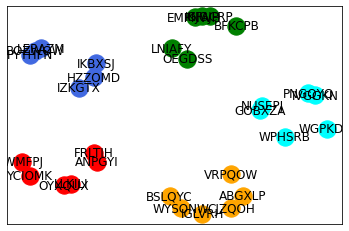

In [47]:
import string, random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random


# Random string generator
def rand_string(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))


# Set up a nodes and networks randomly
nodes = [rand_string() for _ in range(30)]
networks = [rand_string() for _ in range(5)]
networks_list = networks*6
random.shuffle(networks_list)

# Define what nodes belong to what network and what their color should be
node_network_map = dict(zip(nodes, networks_list))
colors = ['green', 'royalblue', 'red', 'orange', 'cyan']
color_map = dict(zip(networks, colors))

graph = nx.Graph()
graph.add_nodes_from(nodes)
nodes_by_color = {val: [node for node in graph if color_map[node_network_map[node]] == val]
                  for val in colors}

# # Take random sparse matrix as adjacency matrix
# mat = sparse_random(30, 30, density=0.3).todense()
# for row, row_val in enumerate(nodes):
#     for col, col_val in enumerate(nodes):
#         if col > row and mat[row, col] != 0.0: # Stick to upper half triangle, mat is not symmetric
#             graph.add_edge(row_val, col_val, weight=mat[row, col])

# Choose a layout to visualize graph
pos = nx.circular_layout(graph)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(colors))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    #color = 'black'
    posx = 0
    if ea in nodes_by_color['green']:
        #color = 'green'
        posx = 0
    elif ea in nodes_by_color['royalblue']:
        #color = 'royalblue'
        posx = 1
    elif ea in nodes_by_color['red']:
        #color = 'red'
        posx = 2
    elif ea in nodes_by_color['orange']:
        #color = 'orange'
        posx = 3
    elif ea in nodes_by_color['cyan']:
        #color = 'cyan'
        posx = 4
    else:
        pass
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]
edges = graph.edges()

# Get the edge weights and normalize them 
weights = [abs(graph[u][v]['weight']) for u, v in edges]
weights_n = [5*float(i)/max(weights) for i in weights] # Change 5 to control thickness

# First draw the nodes 
plt.figure()
for color, node_names in nodes_by_color.items():
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=node_names, node_color=color)

# Then draw edges with thickness defined by weights_n
nx.draw_networkx_edges(graph, pos=pos, width=weights_n)
nx.draw_networkx_labels(graph, pos=pos)
plt.show()

In [46]:
nodes

['KNVATV',
 'YJAUJV',
 'RLHGAN',
 'GDUZSZ',
 'VHUSFG',
 'ASYQIP',
 'MISSFA',
 'ZQNFGT',
 'XNPOUN',
 'ZCSLSD',
 'BAWGOV',
 'HQHBOX',
 'AMCQBS',
 'ZZEDQX',
 'KMWAUF',
 'WKKSTW',
 'LZQXDV',
 'ICFHOD',
 'IHYBPF',
 'PYYGFU',
 'KUBTRV',
 'WFGDLB',
 'BJNVYW',
 'OPVZSC',
 'CKLTQJ',
 'NMXDMZ',
 'STNJYF',
 'OXNMRX',
 'JVGWGH',
 'RFIQAN']

In [43]:
import numpy as np
pos = nx.circular_layout(graph)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(colors))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    #color = 'black'
    posx = 0
    if ea in nodes_by_color['green']:
        #color = 'green'
        posx = 0
    elif ea in nodes_by_color['royalblue']:
        #color = 'royalblue'
        posx = 1
    elif ea in nodes_by_color['red']:
        #color = 'red'
        posx = 2
    elif ea in nodes_by_color['orange']:
        #color = 'orange'
        posx = 3
    elif ea in nodes_by_color['cyan']:
        #color = 'cyan'
        posx = 4
    else:
        pass
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]

In [3]:
nodes = {
    "A": dict(color="Red"),
    "B": dict(color="Red"),
    "C": dict(color="Red"),
    "D": dict(color="Red"),
    "E": dict(color="Blue"),
    "F": dict(color="Blue"),
}
edges = [
    ("A", "E", "Strong"),
    ("B", "F", "Strong"),
    ("C", "E", "Weak"),
    ("D", "F", "Weak"),
]
G = nx.Graph()
for node in nodes:
    attributes = nodes[node]
    G.add_node(node, **attributes)

for source, target, type in edges:
    G.add_edge(source, target, type=type)

node_attributes = ('color', )
edge_attributes = ('type', )
summary_graph = nx.snap_aggregation(G, node_attributes=node_attributes, edge_attributes=edge_attributes)

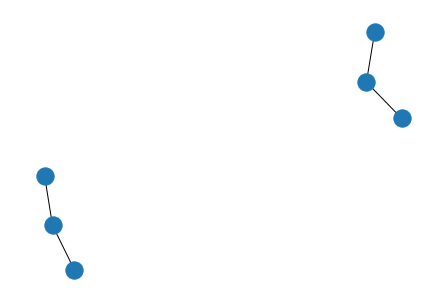

In [6]:
nx.draw(G)

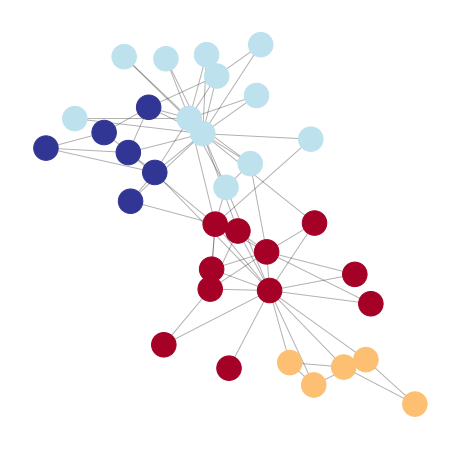

In [40]:
import networkx as nx
import community.community_louvain as louvain
import matplotlib.pyplot as plt

G_k = nx.karate_club_graph()  # load a default graph

partition = louvain.best_partition(G_k)  # compute communities

pos = nx.spring_layout(G_k)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G_k, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_k, pos, alpha=0.3)
plt.show(G_k)

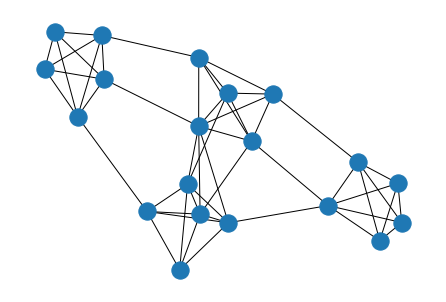

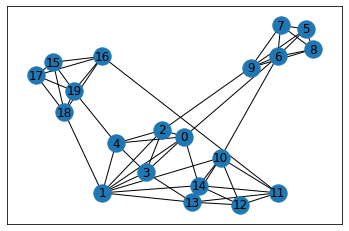

In [41]:
import networkx as nx
import random
import pylab as py
from math import floor

G = nx.complete_graph(20)

for edge in G.edges():
    if floor(edge[0]/5.)!=floor(edge[1]/5.):
        if random.random()<0.95:
            G.remove_edge(edge[0],edge[1])


nx.draw_spring(G)
py.show()


fixedpos = {1:(0,0), 6:(1,1), 11:(1,0), 16:(0,1)}
pos = nx.spring_layout(G, fixed = fixedpos.keys(), pos = fixedpos)

nx.draw_networkx(G, pos=pos)

py.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)

    nx.draw(g, pos, node_color=list(partition.values())); plt.show()
    return

/Users/kiliansprenkamp/miniconda3/envs/telegram/lib/python3.9/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning:

invalid value encountered in true_divide



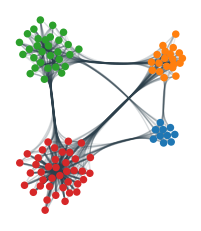

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# installation easiest via pip:
# pip install netgraph
from netgraph import Graph

# create a modular graph
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

# since we created the graph, we know the best partition:
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# # alternatively, we can infer the best partition using Louvain:
# from community import community_louvain
# node_to_community = community_louvain.best_partition(g)

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(g,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()

In [29]:
import numpy as np
pos = nx.circular_layout(graph)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(colors))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    #color = 'black'
    posx = 0
    if ea in nodes_by_color['green']:
        #color = 'green'
        posx = 0
    elif ea in nodes_by_color['royalblue']:
        #color = 'royalblue'
        posx = 1
    elif ea in nodes_by_color['red']:
        #color = 'red'
        posx = 2
    elif ea in nodes_by_color['orange']:
        #color = 'orange'
        posx = 3
    elif ea in nodes_by_color['cyan']:
        #color = 'cyan'
        posx = 4
    else:
        pass
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]

NameError: name 'graph' is not defined

/Users/kiliansprenkamp/miniconda3/envs/telegram/lib/python3.9/site-packages/netgraph/_node_layout.py:993: RuntimeWarning:

invalid value encountered in true_divide



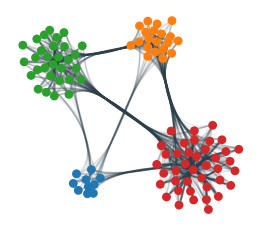

In [26]:
from netgraph import Graph, InteractiveGraph, EditableGraph
plot_instance = InteractiveGraph(g,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),)
plt.show()

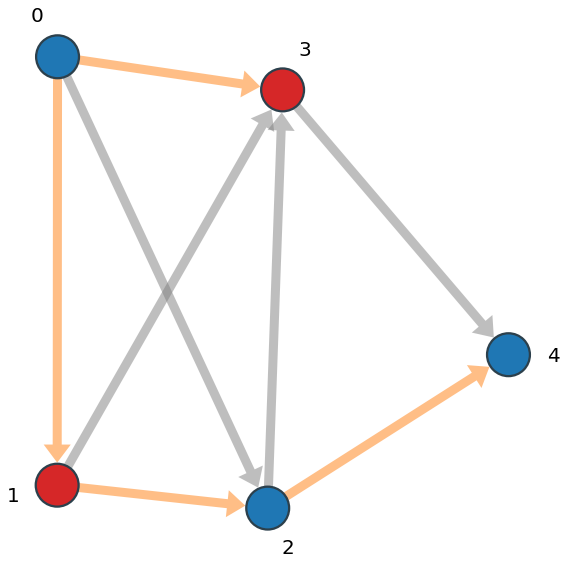

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import InteractiveGraph

g = nx.house_x_graph()

fig, ax = plt.subplots(figsize=(10, 10))

edge_color = dict()
for ii, edge in enumerate(g.edges):
    edge_color[edge] = 'tab:gray' if ii%2 else 'tab:orange'

node_color = dict()
for node in g.nodes:
    node_color[node] = 'tab:red' if node%2 else 'tab:blue'

plot_instance = InteractiveGraph(
    g, node_size=5, node_color=node_color,
    node_labels=True, node_label_offset=0.1, node_label_fontdict=dict(size=20),
    edge_color=edge_color, edge_width=2,
    arrows=True, ax=ax)

plt.show()


In [ ]:
netgraph.InteractiveGraph(G, 
                          node_shape=node_shapes, 
                          node_positions=pos, 
                          edge_positions=pos, 
                          edge_labels=labs)

In [15]:
G.items()

AttributeError: 'Graph' object has no attribute 'items'

In [17]:
type(G)

networkx.classes.graph.Graph

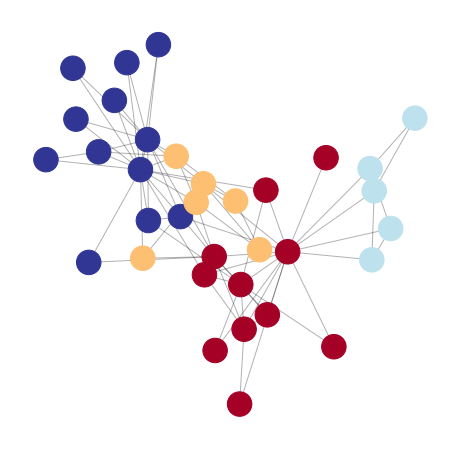

In [7]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [2]:
import community